In [1]:
import pandas as pd

### Import cleaned dataset

In [2]:
df = pd.read_csv('datasets/web_log_data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 6 columns):
ip           5866 non-null object
date_time    5866 non-null object
request      5866 non-null object
step         5866 non-null int64
session      5866 non-null int64
user_id      5866 non-null int64
dtypes: int64(3), object(3)
memory usage: 275.0+ KB


,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,19/Apr/2005:10:13:37,/,1,23,23
6,225-145-222-203.rev.,19/Apr/2005:11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,19/Apr/2005:12:31:54,/,1,26,26
8,203-219-44-170-qld.t,19/Apr/2005:12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,19/Apr/2005:12:42:51,/,1,30,30


In [4]:
#find missing data in a dataset
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))

user_id      0
session      0
step         0
request      0
date_time    0
ip           0
dtype: int64


In [5]:
#data time
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
df['date_time'] =  pd.to_datetime(df['date_time'], format="%d/%b/%Y:%H:%M:%S")

In [6]:
# Create features for year, month, day, hour, and minute 
df['year'] = df['date_time'].dt.year 
df['month'] = df['date_time'].dt.month 
df['day'] = df['date_time'].dt.day 
df['name_of_day'] = df['date_time'].dt.weekday_name 
df['hour'] = df['date_time'].dt.hour 
df['minute'] = df['date_time'].dt.minute

In [7]:
day_map = {'Monday':1, 'Tuesday': 2,'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['name_of_day'] = df['name_of_day'].map(day_map)

In [8]:
df.head()

,ip,date_time,request,step,session,user_id,year,month,day,name_of_day,hour,minute
0,c210-49-32-6.rochd2.,2005-04-18 21:25:07,/,1,3,3,2005,4,18,1,21,25
1,visp.inabox.telstra.,2005-04-19 08:24:28,/,1,12,12,2005,4,19,2,8,24
2,dsl-61-95-54-84.requ,2005-04-19 08:33:01,/,1,13,13,2005,4,19,2,8,33
3,d220-236-91-52.dsl.n,2005-04-19 09:16:06,/,1,15,15,2005,4,19,2,9,16
4,allptrs.eq.edu.au,2005-04-19 09:47:54,/,1,22,22,2005,4,19,2,9,47


In [9]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df2 = df[['step', 'hour', 'name_of_day']]

# convert df2 to matrix
X = df2.as_matrix()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\kmw41\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


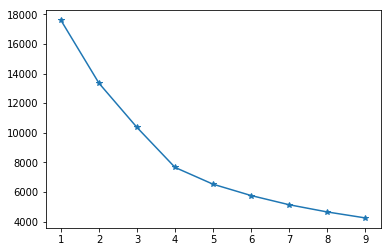

In [18]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
    # plot the inertia vs K values
plt.plot(range(1,10,1), inertia_vals, marker='*')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X, clusters[3].predict(X)))

print(clusters[3])
print("Silhouette score for k=5", silhouette_score(X, clusters[4].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=3 0.2657794040249854
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.3010470296512427
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=5 0.28793722657204324


In [21]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 7659.434160327951
Centroid locations:
[-0.19198788  0.59042456  0.82524143]
[-0.14590137  0.29656485 -0.97154756]
[2.80431189 0.43669609 0.31241287]
[-0.3175147  -1.19703703  0.21580576]


C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Cluster membership
1    2046
0    1844
3    1566
2     410
Name: Cluster_ID, dtype: int64


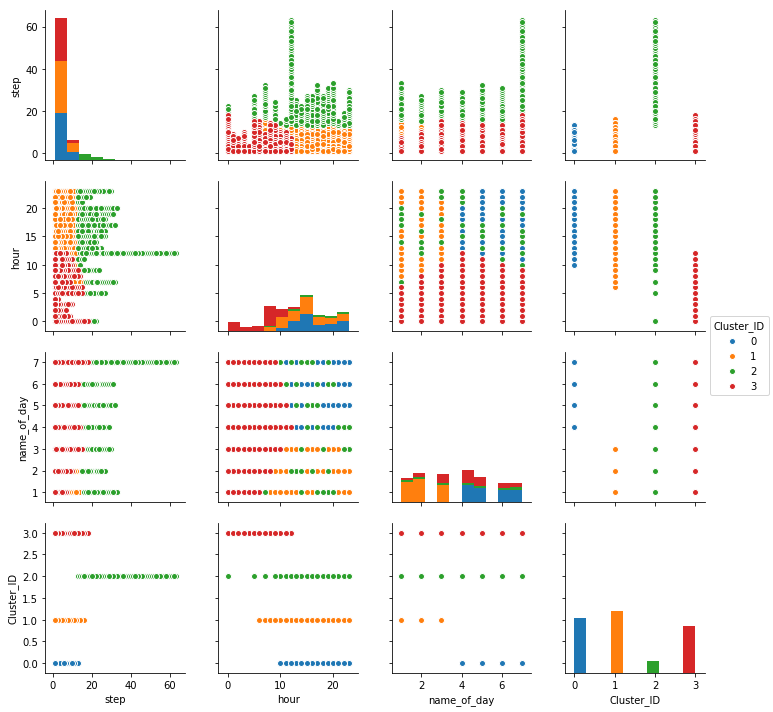

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

model = KMeans(n_clusters=4, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

# Part4.2 Association mining

In [23]:
# group by account, then list all services
transactions = df.groupby(['ip'])['request'].apply(list)
print(transactions.head(20))

ip
002.b.004.brs.iprimu                                  [/, /services.html]
034.mel0205.mel.ipri                                                  [/]
038.b.004.brs.iprimu                                                  [/]
042.058.dsl.mel.ipri                                                  [/]
058.a.001.cns.iprimu    [/eaglefarm/, /eaglefarm/javascript/menu.js, /...
081.a.004.syd.iprimu                                                  [/]
086.a.002.brs.iprimu         [/eaglefarm/, /eaglefarm/javascript/menu.js]
099.a.001.brs.iprimu                             [/, /, /springwood.html]
1.cust21.qld.dsl.oze                                    [/, /favicon.ico]
103.cust20.qld.dsl.o    [/, /favicon.ico, /favicon.ico, /favicon.ico, ...
107.a.004.brs.iprimu    [/, /, /acacia.html, /direct.html, /eaglefarm,...
11.128-142-203.dart.                    [/, /services.html, /whoare.html]
114.a.001.brs.iprimu    [/, /acacia.html, /direct.html, /eaglefarm, /e...
118.a.002.gct.iprimu    [/, /acacia

In [24]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

In [25]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.1, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'/eaglefarm/', '/eaglefarm/javascript/menu.js'}), support=0.21597300337457817, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/eaglefarm/'}), items_add=frozenset({'/eaglefarm/javascript/menu.js'}), confidence=0.923076923076923, lift=3.6150457472043374), OrderedStatistic(items_base=frozenset({'/eaglefarm/javascript/menu.js'}), items_add=frozenset({'/eaglefarm/'}), confidence=0.8458149779735682, lift=3.615045747204337)]), RelationRecord(items=frozenset({'/eaglefarm/', '/eaglefarm/pdf/Web_Price_List.pdf'}), support=0.140607424071991, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/eaglefarm/'}), items_add=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), confidence=0.6009615384615384, lift=3.7360476062399135), OrderedStatistic(items_base=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), items_add=frozenset({'/eaglefarm/'}), confidence=0.8741258741258741, lift=3.7360476062399135)]), RelationRecord(items=frozenset({'/eaglefarm/', '/

In [26]:
result_df = convert_apriori_results_to_pandas_df(results)
print(result_df.head(20))

                            Left_side                         Right_side  \
0                         /eaglefarm/      /eaglefarm/javascript/menu.js   
1       /eaglefarm/javascript/menu.js                        /eaglefarm/   
2                         /eaglefarm/  /eaglefarm/pdf/Web_Price_List.pdf   
3   /eaglefarm/pdf/Web_Price_List.pdf                        /eaglefarm/   
4                         /eaglefarm/               /eaglefarm/pricelist   
5                /eaglefarm/pricelist                        /eaglefarm/   
6                         /eaglefarm/              /eaglefarm/pricelist/   
7               /eaglefarm/pricelist/                        /eaglefarm/   
8       /eaglefarm/javascript/menu.js  /eaglefarm/pdf/Web_Price_List.pdf   
9   /eaglefarm/pdf/Web_Price_List.pdf      /eaglefarm/javascript/menu.js   
10      /eaglefarm/javascript/menu.js               /eaglefarm/pricelist   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
12      /eag

In [27]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(15))

                            Left_side                         Right_side  \
19              /eaglefarm/pricelist/               /eaglefarm/pricelist   
18               /eaglefarm/pricelist              /eaglefarm/pricelist/   
17              /eaglefarm/pricelist/  /eaglefarm/pdf/Web_Price_List.pdf   
16  /eaglefarm/pdf/Web_Price_List.pdf              /eaglefarm/pricelist/   
14  /eaglefarm/pdf/Web_Price_List.pdf               /eaglefarm/pricelist   
15               /eaglefarm/pricelist  /eaglefarm/pdf/Web_Price_List.pdf   
4                         /eaglefarm/               /eaglefarm/pricelist   
5                /eaglefarm/pricelist                        /eaglefarm/   
13              /eaglefarm/pricelist/      /eaglefarm/javascript/menu.js   
12      /eaglefarm/javascript/menu.js              /eaglefarm/pricelist/   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
10      /eaglefarm/javascript/menu.js               /eaglefarm/pricelist   
7           

In [28]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(15))

                            Left_side                         Right_side  \
18               /eaglefarm/pricelist              /eaglefarm/pricelist/   
19              /eaglefarm/pricelist/               /eaglefarm/pricelist   
13              /eaglefarm/pricelist/      /eaglefarm/javascript/menu.js   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
16  /eaglefarm/pdf/Web_Price_List.pdf              /eaglefarm/pricelist/   
9   /eaglefarm/pdf/Web_Price_List.pdf      /eaglefarm/javascript/menu.js   
14  /eaglefarm/pdf/Web_Price_List.pdf               /eaglefarm/pricelist   
0                         /eaglefarm/      /eaglefarm/javascript/menu.js   
5                /eaglefarm/pricelist                        /eaglefarm/   
17              /eaglefarm/pricelist/  /eaglefarm/pdf/Web_Price_List.pdf   
7               /eaglefarm/pricelist/                        /eaglefarm/   
15               /eaglefarm/pricelist  /eaglefarm/pdf/Web_Price_List.pdf   
3   /eaglefa

In [29]:
df = pd.read_csv('datasets/web_log_data.csv')

In [30]:
df

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,19/Apr/2005:10:13:37,/,1,23,23
6,225-145-222-203.rev.,19/Apr/2005:11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,19/Apr/2005:12:31:54,/,1,26,26
8,203-219-44-170-qld.t,19/Apr/2005:12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,19/Apr/2005:12:42:51,/,1,30,30


In [44]:
transactions = df.groupby(['user_id','step'])['request'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:10])

[['/robots.txt'], ['/code/Global/code/menu.html'], ['/'], ['/favicon.ico'], ['/services.html'], ['/more.html'], ['/guarantee.html'], ['/robots.txt'], ['/code/Ultra/services.htm'], ['/richlands']]


In [51]:
transactions = df.groupby(['user_id'])['request'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:10])

[['/robots.txt'], ['/code/Global/code/menu.html'], ['/', '/favicon.ico', '/guarantee.html', '/more.html', '/services.html'], ['/robots.txt'], ['/code/Ultra/services.htm'], ['/richlands', '/richlands/', '/richlands/fileupload', '/richlands/fileupload/', '/richlands/javascript/menu.js'], ['/eaglefarm', '/eaglefarm/specials/', '/richlands', '/richlands/contact', '/richlands/services/printing', '/robots.txt'], ['/robots.txt'], ['/code/Global/code/oform.html'], ['/cgi-bin/FormMail.pl', '/cgi-bin/FormMail.pl', '/richlands', '/richlands/fileupload', '/richlands/fileupload/upload.htm', '/richlands/fileupload/upload.htm']]


In [52]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    #supp_param = '{}%'.format(int(min_sup * 100))
    #conf_param = '{}%'.format(int(min_conf * 100))
    #subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10%', '10%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [55]:
get_association_rules(sequences, 0.1, 0.1)

,Left_rule,Right_rule,Support,Confidence
0,"[/, /more.html]",[/services.html],0.046416,0.803571
1,"[/, /eaglefarm/]",[/eaglefarm/javascript/menu.js],0.031460,0.910448
2,[/more.html],[/services.html],0.051057,0.712230
3,[/richlands],[/richlands/],0.036617,0.898734
4,[/richlands/],[/richlands/javascript/menu.js],0.030944,0.769231
5,[/eaglefarm],[/eaglefarm/],0.038164,0.880952
6,[/eaglefarm],"[/eaglefarm/, /eaglefarm/javascript/menu.js]",0.030428,0.702381
7,[/eaglefarm],[/eaglefarm/javascript/menu.js],0.030428,0.702381
8,"[/eaglefarm, /eaglefarm/]",[/eaglefarm/javascript/menu.js],0.030428,0.797297
9,"[/eaglefarm/, /eaglefarm/javascript/menu.js]",[/eaglefarm/specials/],0.034038,0.302752
